 SCRIPT FUNCTION

- Requires pre-epoched data
- applies a 15Hz low pass filter 
- Generates event related potentials
- Compares ERPs from 2 brain states

In [1]:
#LOAD MODULES
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy import signal
from random import randrange
from numpy import shape as s
import mne
import os
import sys

#LOAD DATA
os.chdir(r'C:\Users\rhyso\eegdata')
all_epochs = mne.read_epochs('all_epochs_GW-epo.fif', preload= True)
mne.Epochs.filter(all_epochs, l_freq = None, h_freq = 15) # low pass filter 15Hz

Reading all_epochs_GW-epo.fif ...
    Found the data of interest:
        t =  -20000.00 ...   30000.00 ms
        0 CTF compensation matrices available
94 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Setting up low-pass filter at 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 221 samples (0.884 sec)



<EpochsFIF  |   94 events (all good), -20 - 30 sec, baseline [-20, 0], ~44.8 MB, data loaded,
 '1': 94>

<IPython.core.display.Javascript object>


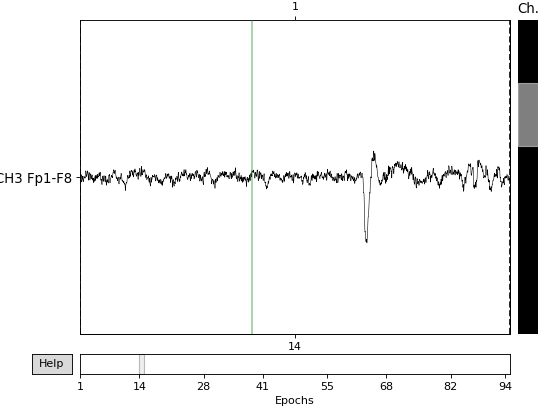

<IPython.core.display.Javascript object>


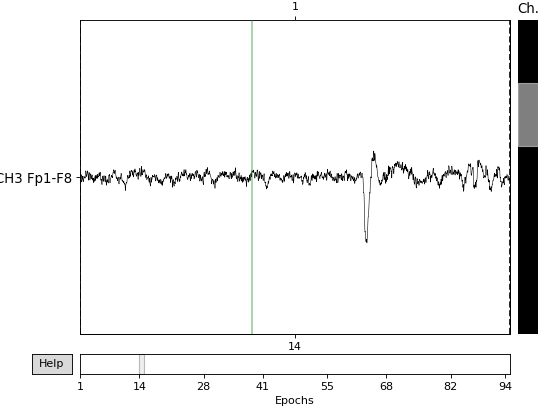

In [3]:
#EXCLUDE EPOCHS WITH STIMULI-INDUCED ARTEFACTS

import matplotlib
%matplotlib notebook
mne.Epochs.plot(all_epochs, n_epochs = 1, n_channels = 1, block = True)

<IPython.core.display.Javascript object>


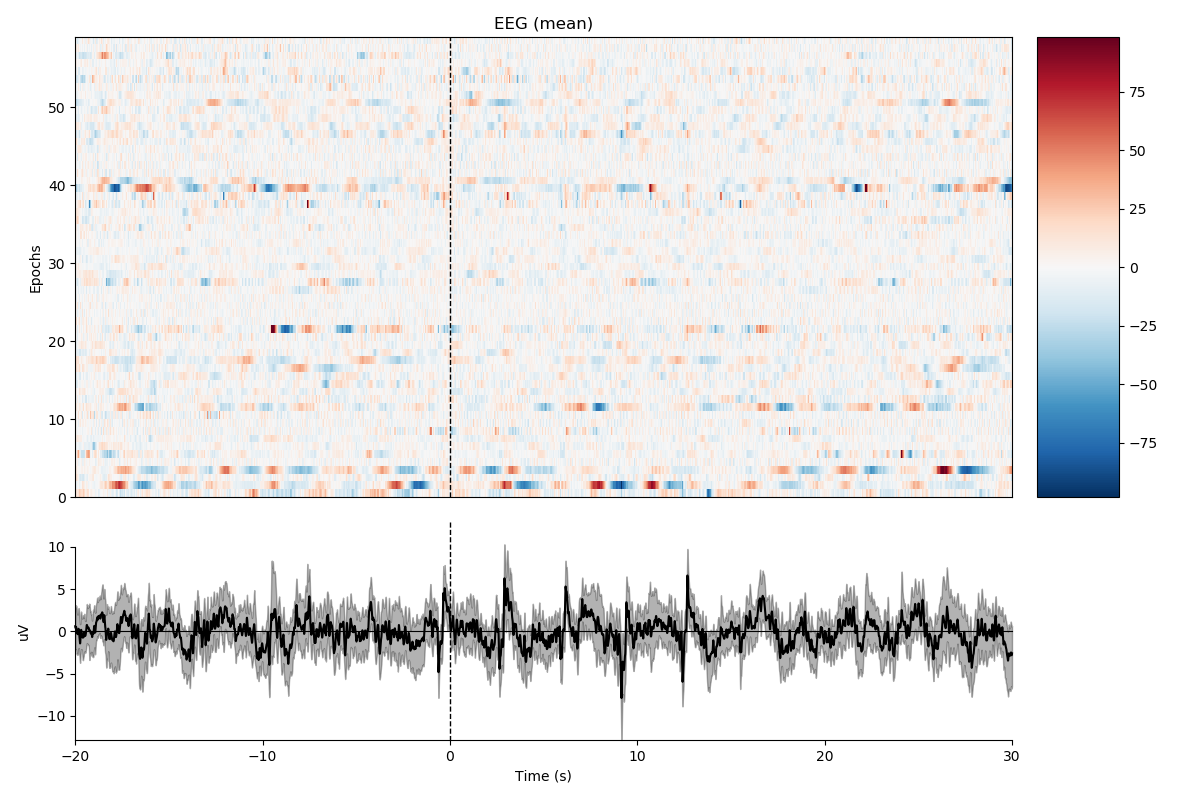

59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


In [4]:
#PLOT ERPs 

fig = plt.rcParams["figure.figsize"]= [12, 8]
fig = mne.Epochs.plot_image(all_epochs, combine= 'mean')

<IPython.core.display.Javascript object>


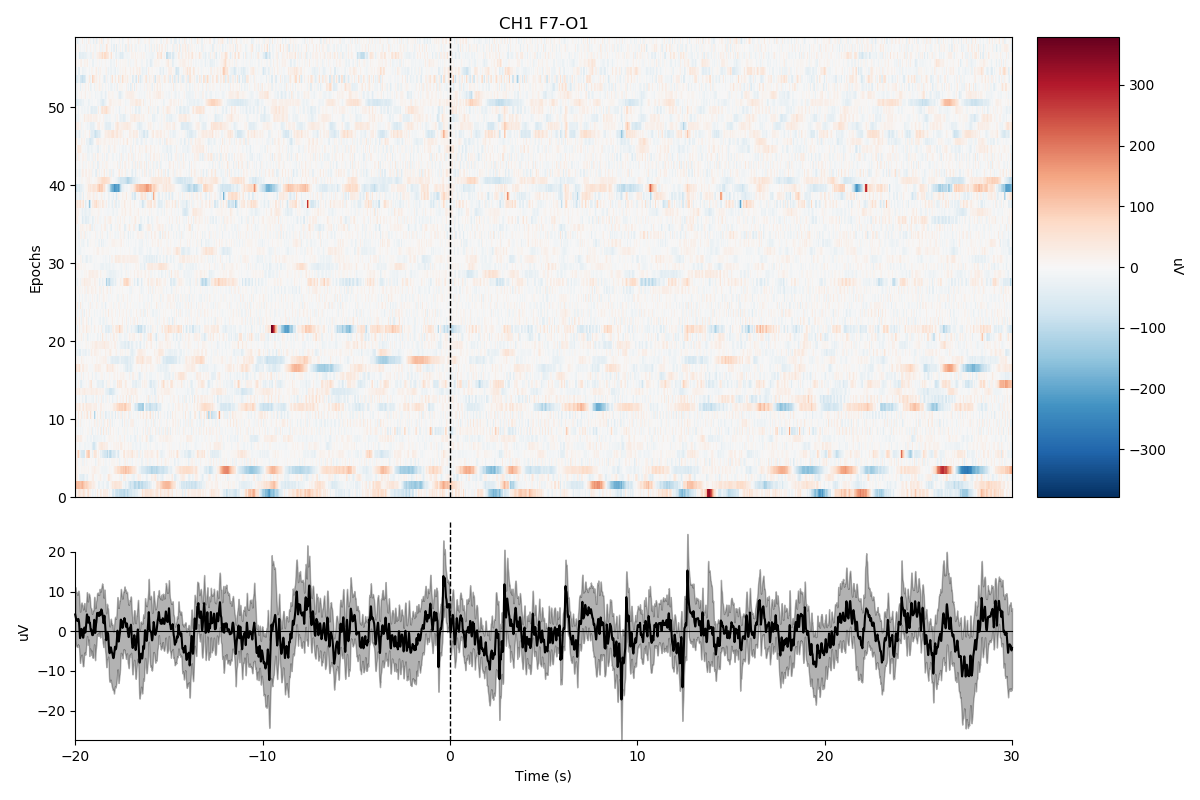

59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-5-ec1262c49bff>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.Epochs.plot_image(all_epochs, picks = all_epochs.ch_names[i], combine = None)


<IPython.core.display.Javascript object>


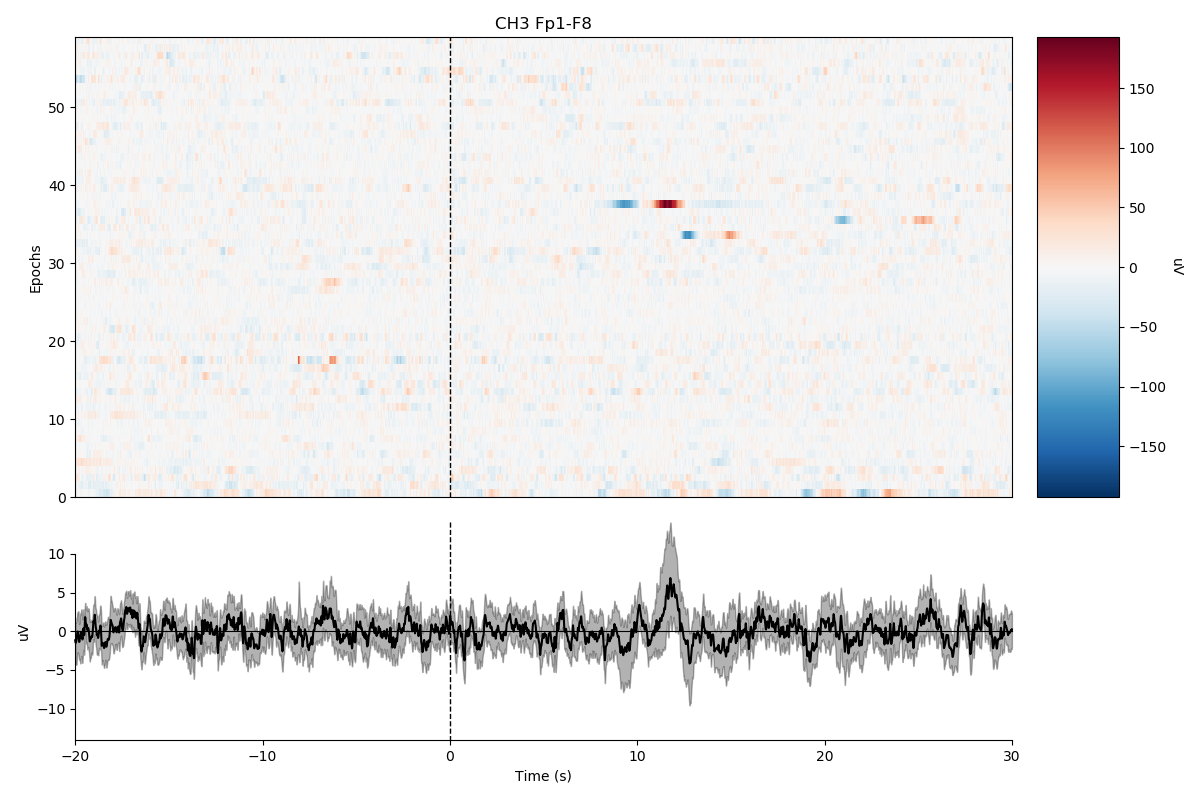

59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-5-ec1262c49bff>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.Epochs.plot_image(all_epochs, picks = all_epochs.ch_names[i], combine = None)


<IPython.core.display.Javascript object>


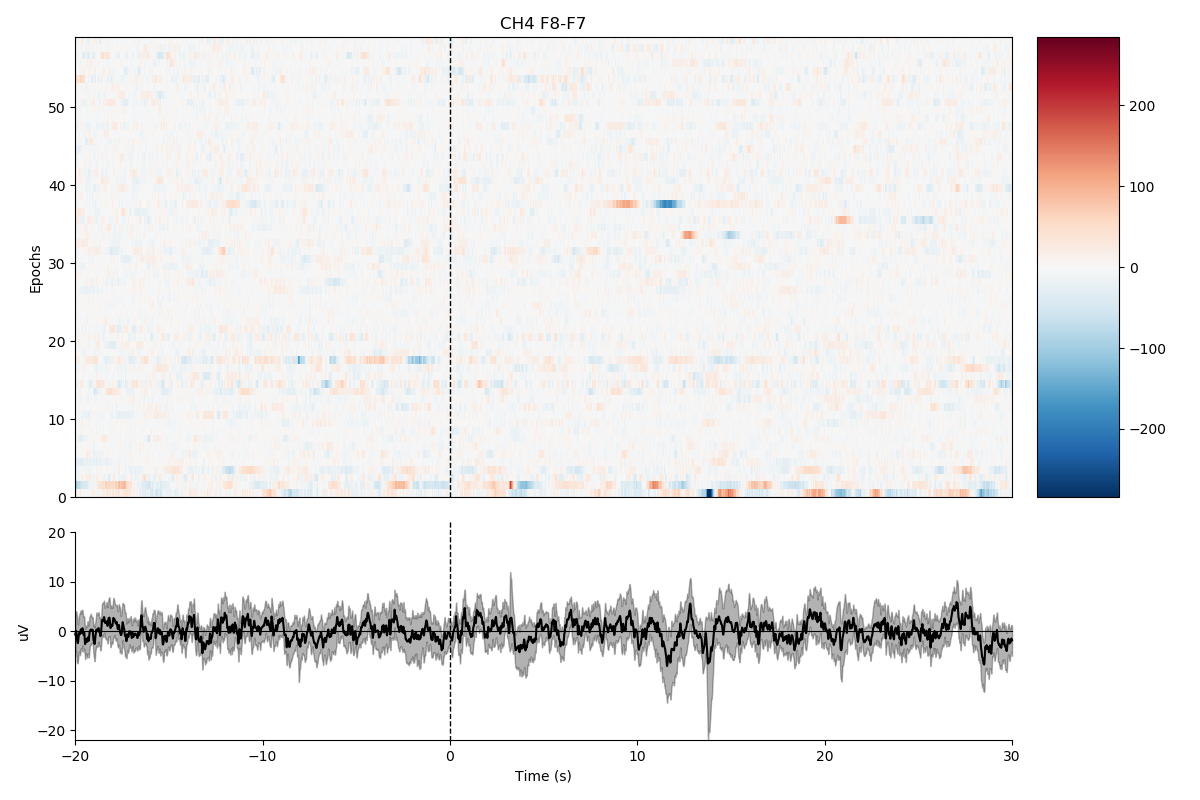

59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-5-ec1262c49bff>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.Epochs.plot_image(all_epochs, picks = all_epochs.ch_names[i], combine = None)


<IPython.core.display.Javascript object>


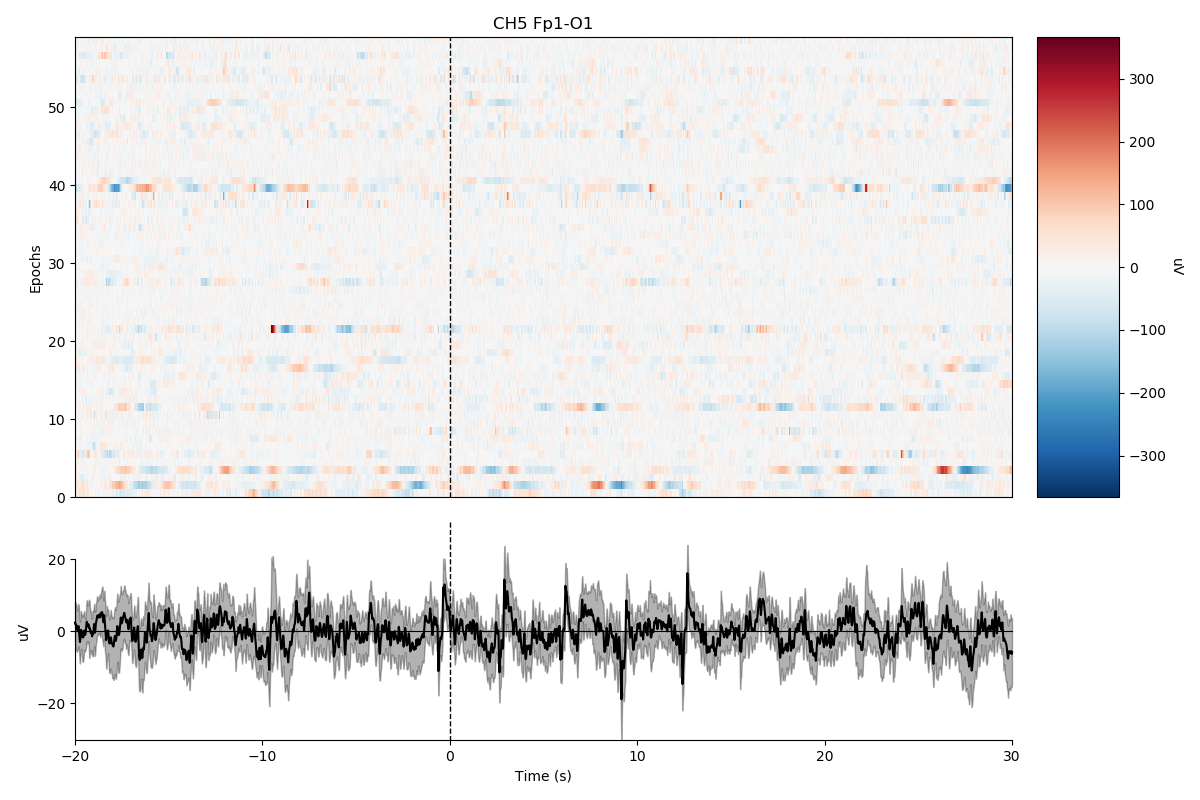

59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-5-ec1262c49bff>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.Epochs.plot_image(all_epochs, picks = all_epochs.ch_names[i], combine = None)


<IPython.core.display.Javascript object>


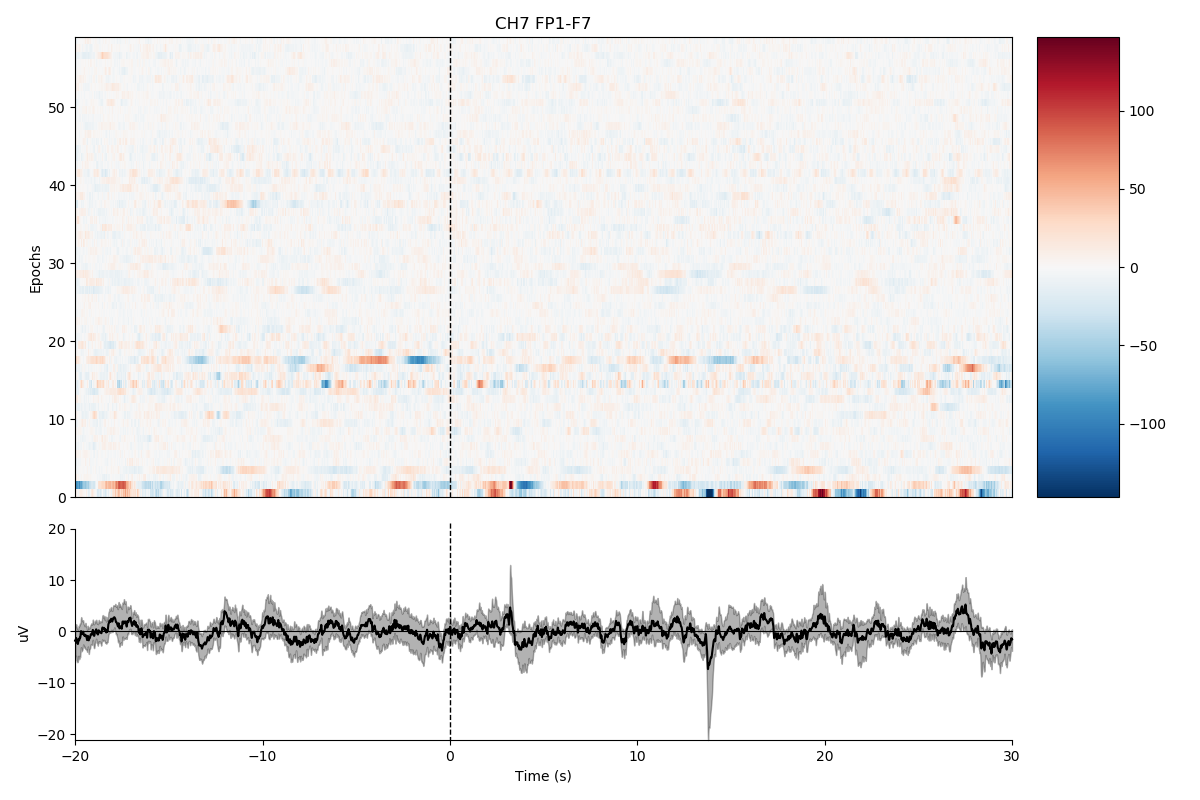

59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-5-ec1262c49bff>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.Epochs.plot_image(all_epochs, picks = all_epochs.ch_names[i], combine = None)


In [5]:
for i in range(len(all_epochs.ch_names)):
    mne.Epochs.plot_image(all_epochs, picks = all_epochs.ch_names[i], combine = None)

N.o freqs within band of interest  15


<IPython.core.display.Javascript object>


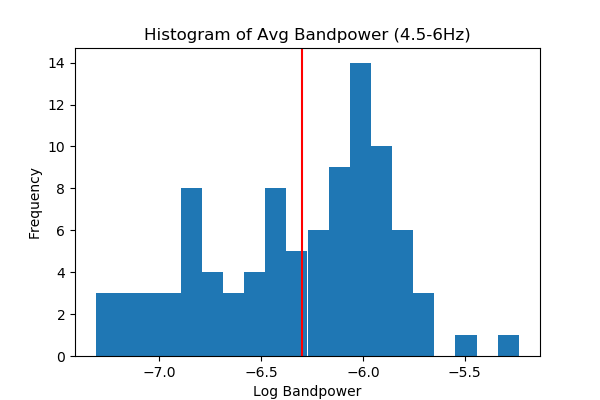

The number of high brain state epochs: 51
The number of low brain state epochs: 43
Same number of epochs in each condition?  True


<IPython.core.display.Javascript object>


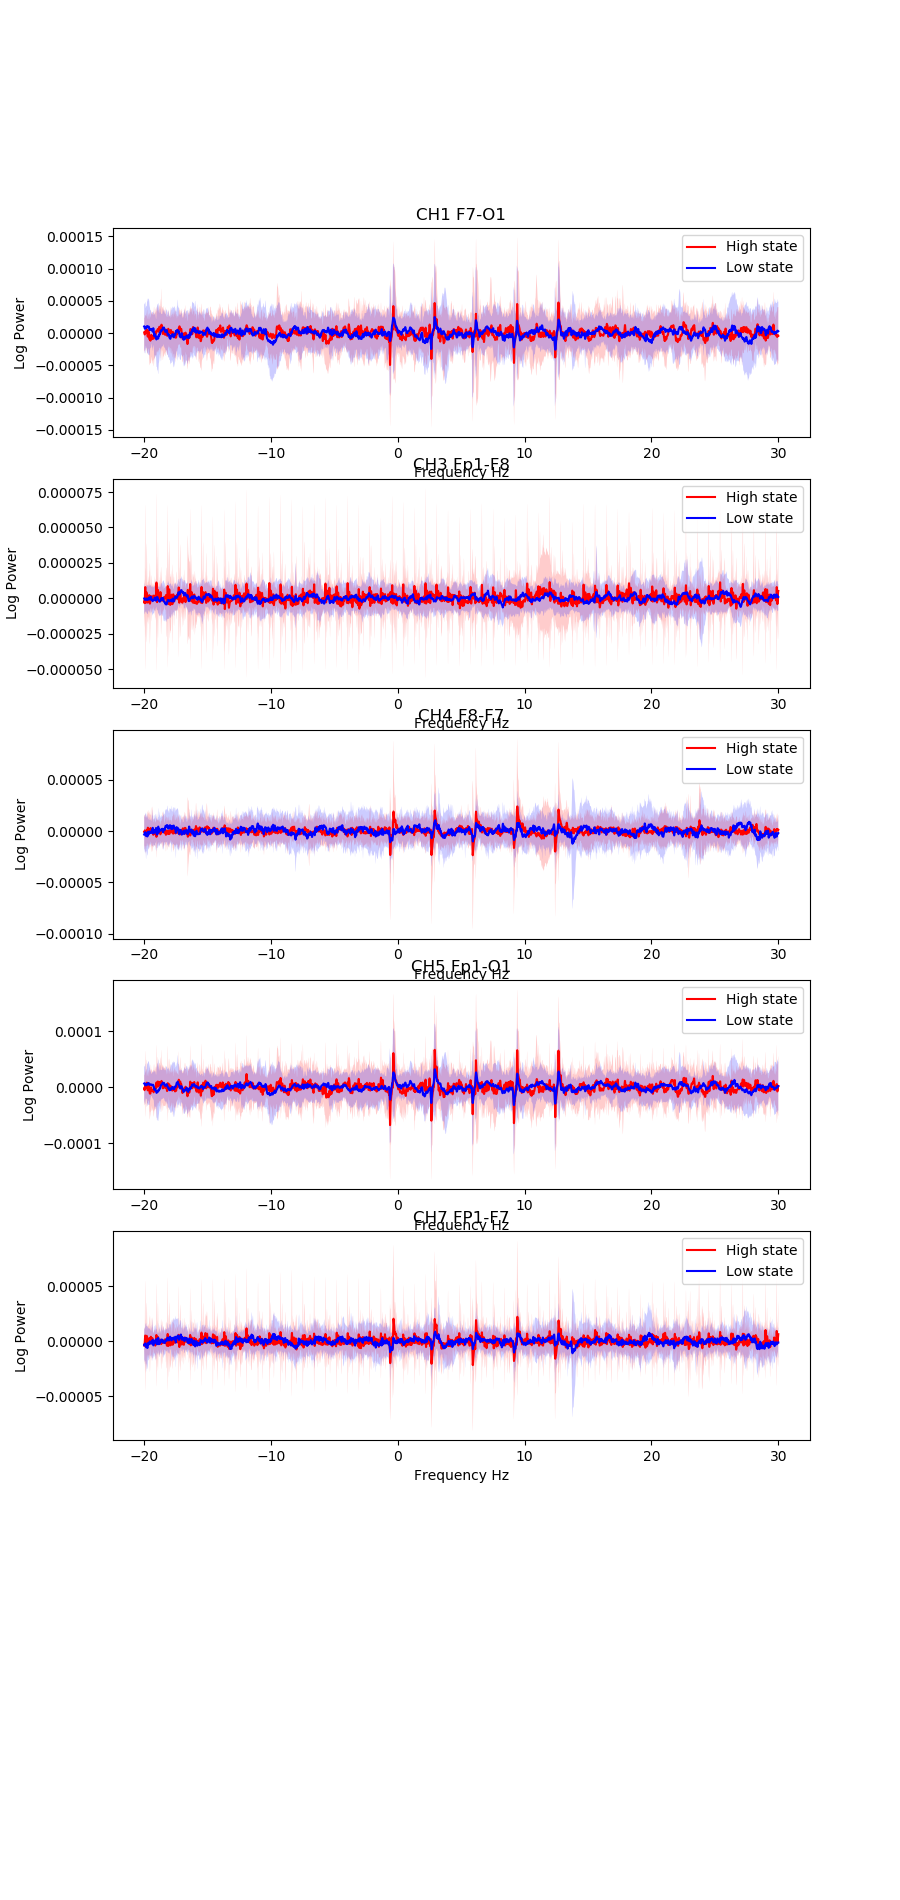

In [4]:
#COMPARE ERPs of high vs low brain states

import mbp as mbp
# Generate np array with only baseline segments
base_epochs = mne.Epochs.copy(all_epochs)
base_epochs = mne.Epochs.crop(base_epochs, tmin = -19, tmax = -4)
base_epochs = mne.Epochs.get_data(base_epochs)
import matplotlib
%matplotlib notebook
#initialise 
dft_freqs = np.arange(1, 15, 0.1) # select frequencies of interest
base_dft = np.zeros((base_epochs.shape[1], base_epochs.shape[0], len(dft_freqs)-1)) # create empty dft array (nchans, nepochs,
#nfreq)

#iterate through channels and calculate dft
for i in range(base_epochs.shape[1]):
    base_dft[i,:,:] = np.squeeze(mbp.mbp(base_epochs[:,i,:], freqs = dft_freqs, fs = 250)) 
  
# SUBDIVIDE EPOCHS INTO HIGH AND LOW BRAIN STATES 

adj_freqs = np.linspace(1, 15, num = len(dft_freqs)-1)
#identify indices of dft_freqs between 4.5 and 6Hz 
freq_lim = [4.5, 6]
freq_index = np.where((adj_freqs >= freq_lim[0]) & (adj_freqs <= freq_lim[1]))[0] 
print('N.o freqs within band of interest ', len(freq_index))

#initialise
avg_bandpower = np.zeros( base_dft.shape[1]) # create empty array ( n_epochs)

#iterate through epochs
for j in range(base_dft.shape[1]):
        avg_bandpower[j] = np.mean(base_dft[3,j,freq_index], axis = 0) 


# PLOT histograms of avg 4.5-6Hz power across individual epochs 
plt.figure( figsize = (6,4))
thresh = -6.30
plt.hist(avg_bandpower, bins = 20)
plt.title('Histogram of Avg Bandpower (4.5-6Hz)')
plt.xlabel('Log Bandpower')
plt.ylabel('Frequency')
plt.axvline(x= thresh, color = 'r')
plt.show()


#identify epoch indices corresponding to high and low brain states

thresh = -6.30 # set threshold log power value which separates high/low brain state 

high_index = np.where(avg_bandpower > thresh)[0] # indices of high brain state epochs
print('The number of high brain state epochs:', len(high_index))
low_index = np.where(avg_bandpower <= thresh)[0] # indices of low brain state epochs
print('The number of low brain state epochs:', len(low_index))
          
# Equalise number of low vs high brain state epochs used
high_count = len(high_index)
low_count = len(low_index)

if high_count > low_count: 
    adj_high = np.random.choice(high_index, size = low_count, replace = False)
    adj_low = low_index
elif high_count < low_count:
    adj_low = np.random.choice(low_index, size = high_count, replace = False)
    adj_high = high_index
else: 
    pass 

print('Same number of epochs in each condition? ', len(adj_low) == len(adj_high)) # sanity check
          
          
# PLOT ERPS: HIGH VS LOW
          
np_epochs = mne.Epochs.copy(all_epochs)  
np_epochs = mne.Epochs.get_data(np_epochs)
low_erp = np.mean(np_epochs[adj_low, :, :], axis = 0) # take low state epochs
high_erp = np.mean(np_epochs[adj_high, :, :], axis = 0) # take high state epochs
low_error = np.std(np_epochs[adj_low, :, :], axis = 0) # std
high_error = np.std(np_epochs[adj_high, :, :], axis = 0) # std

labels = ['Low state', 'High state']
time_axis = np.linspace(-20,30, num = low_erp.shape[1])
plt.figure( figsize = (9,19))
for i in range(low_erp.shape[0]):
    plt.subplot(6,1,i+1)
    plt.plot(time_axis, high_erp[i,:], color = 'r', label = labels[1])
    plt.fill_between(time_axis, high_erp[i,:] - high_error[i,:], high_erp[i,:] + high_error[i,:], facecolor = 'r', alpha=0.2)
    plt.plot(time_axis, low_erp[i,:], color = 'b', label = labels[0])
    plt.fill_between(time_axis, low_erp[i,:] - low_error[i,:], low_erp[i,:] + low_error[i,:], facecolor = 'b', alpha = 0.2)

    plt.title(all_epochs.ch_names[i])
    plt.xlabel('Frequency Hz')
    plt.ylabel('Log Power')
    plt.legend(loc = 'upper right', prop={'size': 10})
plt.show()